In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:

data = pd.read_csv("../data/data_news.csv", index_col=0)
print(data.info())
data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 62742 entries, 0 to 94653
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   62224 non-null  object
 1   text    62741 non-null  object
 2   label   62742 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB
None


(62742, 3)

In [22]:
data = data.dropna(subset=['text'])
data.shape

(62741, 3)

<Axes: xlabel='label', ylabel='count'>

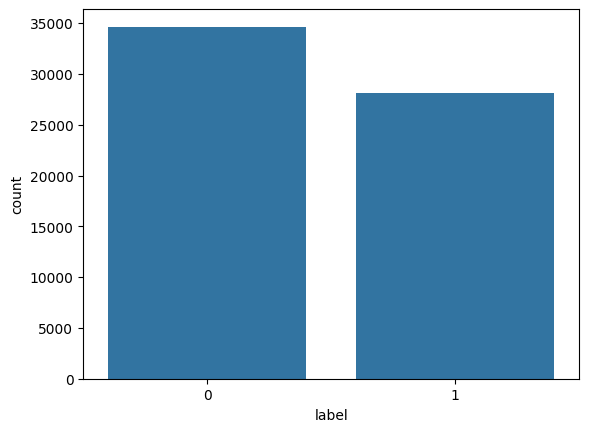

In [23]:
sns.countplot(data=data, 
              x='label', 
              order=data['label'].value_counts().index)

In [24]:
from tqdm import tqdm 
import re 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maeln\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maeln\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import re
from nltk.corpus import stopwords
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

# Fonction pour traiter une seule phrase
def preprocess_sentence(sentence):
    sentence = re.sub(r'[^\w\s]', '', sentence)
    return ' '.join(token.lower() for token in str(sentence).split() if token not in stopwords.words('english'))

# Fonction principale pour traiter tout le texte
def preprocess_text(text_data):
    with Pool(cpu_count()) as pool:
        preprocessed_text = list(tqdm(pool.imap(preprocess_sentence, text_data), total=len(text_data)))
    
    return preprocessed_text

In [26]:

def preprocess_text(text_data): 
    preprocessed_text = [] 
      
    for sentence in tqdm(text_data): 
        sentence = re.sub(r'[^\w\s]', '', sentence) 
        preprocessed_text.append(' '.join(token.lower() 
                                  for token in str(sentence).split() 
                                  if token not in stopwords.words('english'))) 
  
    return preprocessed_text

In [27]:
updated_data = data.copy()

In [28]:
import re
from nltk.corpus import stopwords
import nltk

# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess a single sentence
def preprocess_sentence(sentence):
    sentence = re.sub(r'[^\w\s]', '', sentence)
    return ' '.join(token.lower() for token in sentence.split() if token.lower() not in stop_words)

# Function to preprocess text
def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in text_data:
        preprocessed_text.append(preprocess_sentence(sentence))
    return preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maeln\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
preprocessed_review = preprocess_text(data['text'].values) 
updated_data['text'] = preprocessed_review

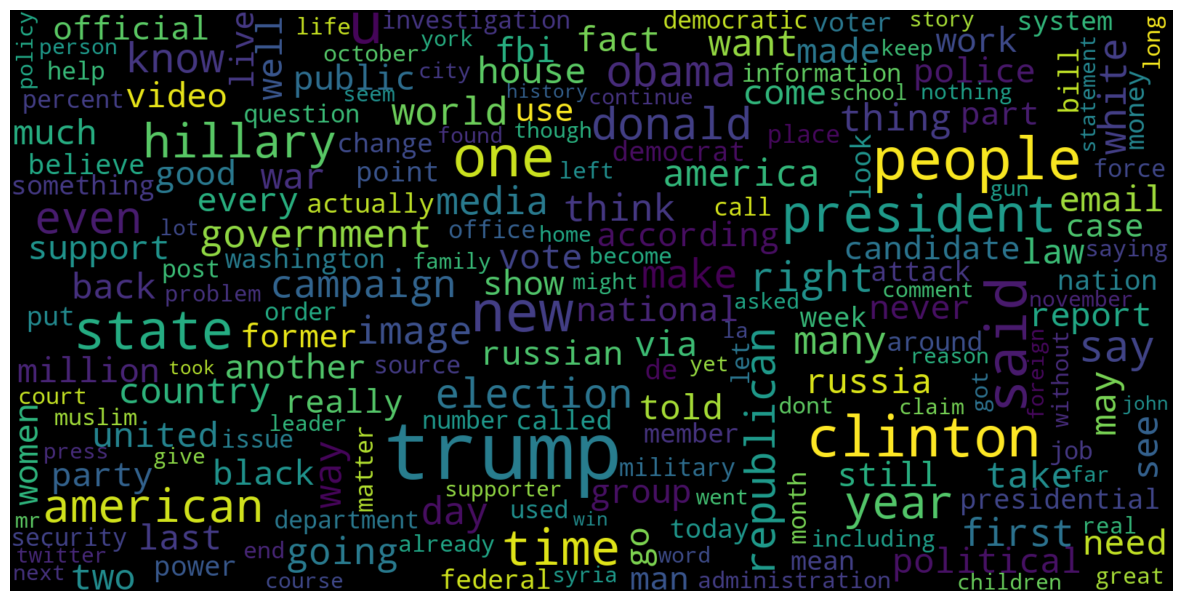

In [30]:
# Real 
consolidated = ' '.join( 
    word for word in updated_data['text'][data['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
                      height=800, 
                      random_state=21, 
                      max_font_size=110, 
                      collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

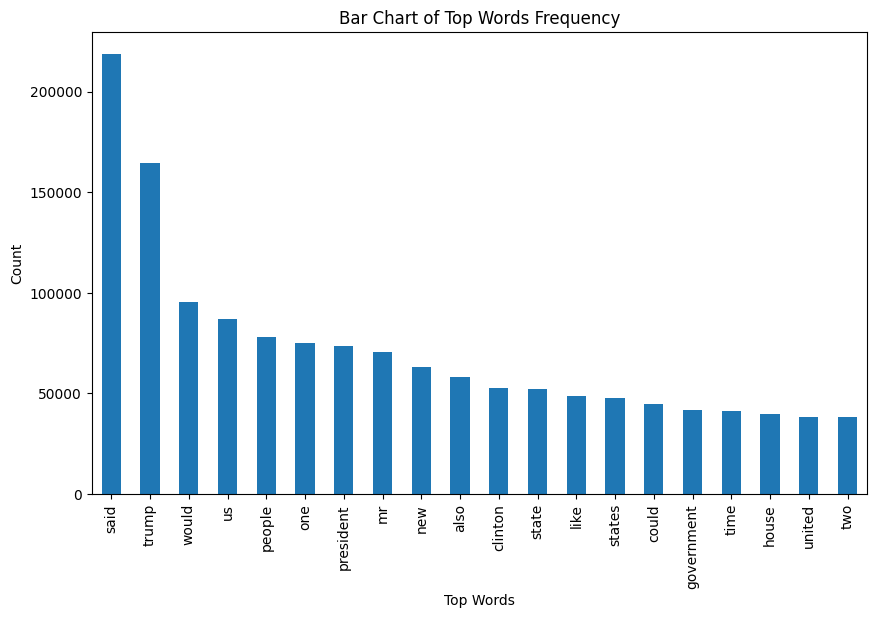

In [31]:
from sklearn.feature_extraction.text import CountVectorizer 
  
  
def get_top_n_words(corpus, n=None): 
    vec = CountVectorizer().fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()] 
    words_freq = sorted(words_freq, key=lambda x: x[1], 
                        reverse=True) 
    return words_freq[:n] 
  
  
common_words = get_top_n_words(updated_data['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(10, 6), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Frequency")

In [32]:

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
  
x_train, x_test, y_train, y_test = train_test_split(updated_data['text'],  
                                                    updated_data['label'],  
                                                    test_size=0.25)

In [33]:

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)

In [34]:

from sklearn.linear_model import LogisticRegression 
  
model = LogisticRegression() 
model.fit(x_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

0.9689087238338115
0.9526966721917633
